In [136]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

In [137]:
data_train = pd.read_csv("data/train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [139]:
data_train.replace(["female", "male"], [0, 1], inplace=True)
data_train.fillna(data_train['Age'].mean().round(), inplace=True)
data_train.head(6)

C:\Users\AmirrezA\AppData\Local\Temp\ipykernel_12212\749613323.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.replace(["female", "male"], [0, 1], inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,30.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,30.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,30.0,S
5,6,0,3,"Moran, Mr. James",1,30.0,0,0,330877,8.4583,30.0,Q


In [140]:
X_train = np.array(data_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]])
Y_train = np.array(data_train[["Survived"]])

In [141]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation="sigmoid"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(8, activation="sigmoid"),
    tf.keras.layers.Dense(2, activation="softmax")
])

In [142]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss="sparse_categorical_crossentropy",
              metrics =["accuracy"])

In [143]:
output = model.fit(X_train, Y_train, epochs=100)
#model.evaluate(X_test, Y_test)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4688 - loss: 0.7449   
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6658 - loss: 0.6265 
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6964 - loss: 0.6057 
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6769 - loss: 0.5896 
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6647 - loss: 0.5822 
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7583 - loss: 0.5206 
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7950 - loss: 0.4661 
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7915 - loss: 0.4767 
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8052 - loss: 0.4438 
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7561 - loss: 0.5158 
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8120 - loss: 0.4372 
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

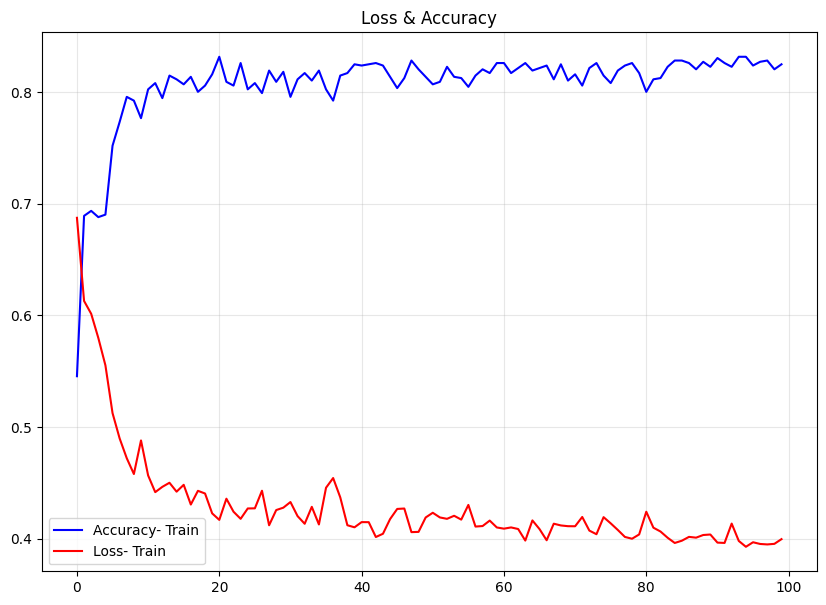

In [144]:
plt.figure(figsize=(10, 7))
plt.plot(output.history["accuracy"], label="Accuracy- Train",color='blue')
plt.plot(output.history["loss"], label="Loss- Train", color='red')
plt.title("Loss & Accuracy")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [145]:
data_test = pd.read_csv("data/test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [146]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [147]:
data_test.replace(["female", "male"], [0, 1], inplace=True)
data_test.fillna(data_train['Age'].mean().round(), inplace=True)
data_test.head()

C:\Users\AmirrezA\AppData\Local\Temp\ipykernel_12212\211238621.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.replace(["female", "male"], [0, 1], inplace=True)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,30.0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,30.0,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,30.0,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,30.0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,30.0,S


In [148]:
data_target = pd.read_csv("data/gender_submission.csv")
data_target.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [149]:
data_target.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [150]:
X_test = np.array(data_test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]])
Y_test = np.array(data_target[["Survived"]])

In [151]:
y_pred = np.argmax(model.predict(X_test), axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [152]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

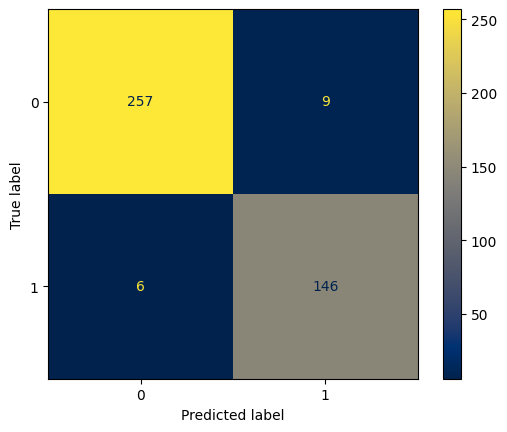

In [153]:
confusion_matrix = confusion_matrix(Y_test, y_pred)
displiay_confusion = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
displiay_confusion.plot(cmap='cividis')
plt.show()

In [154]:
evaluate = model.evaluate(X_test, Y_test)
print("The Loss of the Test Data is:", evaluate[0])
print("The Accuracy of the Test Data is:", evaluate[1])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9646 - loss: 0.3261 
The Loss of the Test Data is: 0.3121691346168518
The Accuracy of the Test Data is: 0.9641148447990417


In [155]:
precision = precision_score(Y_test, y_pred, average='binary')
print("The Precision is:", precision)

recall = recall_score(Y_test, y_pred, average='binary')
print("The Recall is:", recall)

f1 = f1_score(Y_test, y_pred, average='binary')
print("The F1-score is:", f1)

The Precision is: 0.9419354838709677
The Recall is: 0.9605263157894737
The F1-score is: 0.9511400651465798


In [158]:
jack_data = np.array([[3, 1, 20, 0, 0, 8.05]])
rose_data = np.array([[1, 0, 19, 0, 0, 75.0]])

jack_prediction = np.argmax(model.predict(jack_data), axis=1)
rose_prediction = np.argmax(model.predict(rose_data), axis=1)
print(f"Jack's Survival Prediction: {'Survived' if jack_prediction[0] == 1 else 'Did not survive'}")
print(f"Rose's Survival Prediction: {'Survived' if rose_prediction[0] == 1 else 'Did not survive'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Jack's Survival Prediction: Did not survive
Rose's Survival Prediction: Survived


KNN

In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train.ravel())
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(Y_test, knn_pred)
print("KNN Accuracy is:", knn_accuracy)

KNN Accuracy is: 0.6602870813397129


Perceptron

In [173]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
perceptron_pred = perceptron.predict(X_test)
perceptron_accuracy = accuracy_score(Y_test, perceptron_pred)
print("Perceptron Accuracy is:", perceptron_accuracy)

Perceptron Accuracy is: 0.6411483253588517


c:\Users\AmirrezA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [174]:
print("MLP accuracy is:", evaluate[1])
print("KNN accuracy is:", knn_accuracy)
print("Perseptron accuracy is", perceptron_accuracy)

MLP accuracy is: 0.9641148447990417
KNN accuracy is: 0.6602870813397129
Perseptron accuracy is 0.6411483253588517
